In [1]:
import sys
sys.path.append('../..')

In [2]:
# Unit test for the compute_crps, compare CRPS computed by our code and another library
# There should be a tiny difference because of different numerical integration algorithms
import properscoring as ps
import numpy as np
import torch
from torchuq.metric.distribution import compute_crps

n_sample = 1000

predictions = torch.distributions.normal.Normal(loc=torch.zeros(n_sample), scale=torch.ones(n_sample))
wrong_dist = torch.distributions.normal.Normal(loc=torch.zeros(n_sample), scale=torch.ones(n_sample) * 0.1)
samples = predictions.sample()
print(compute_crps(predictions, torch.ones(n_sample)).mean())
print(compute_crps(predictions, samples).mean())
print(compute_crps(wrong_dist, samples).mean())

print(ps.crps_gaussian(np.ones(n_sample), mu=np.zeros(n_sample), sig=np.ones(n_sample)).mean())
print(ps.crps_gaussian(samples, mu=np.zeros(n_sample), sig=np.ones(n_sample)).mean())
print(ps.crps_gaussian(samples, mu=np.zeros(n_sample), sig=np.ones(n_sample) * 0.1).mean())

tensor(0.6025)
tensor(0.5476)
tensor(0.7286)
0.6024413576276163
0.5475328184218637
0.7295584235305873


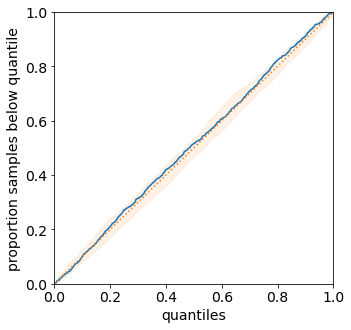

In [3]:
# Test plot_reliability_diagram
from torchuq.metric.distribution import plot_reliability_diagram
from matplotlib import pyplot as plt

plot_reliability_diagram(predictions, samples)
plt.show()

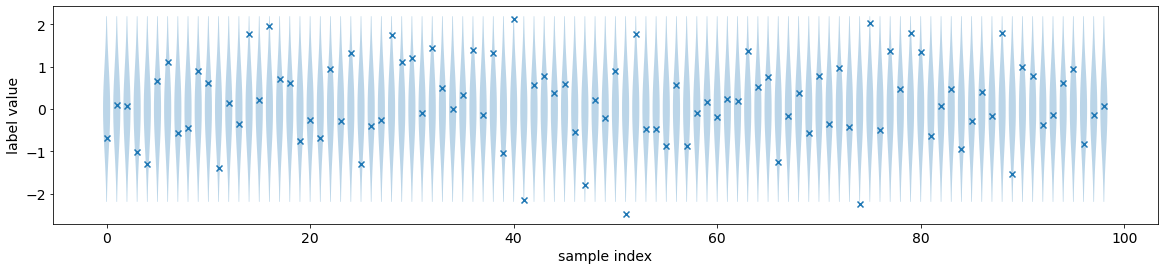

In [4]:
from torchuq.metric.distribution import plot_density 
plot_density(predictions, samples)
plt.show()